<a href="https://colab.research.google.com/github/NMashalov/Python-MIPT-education-course-2023-Spring/blob/main/%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D0%BE%D0%B4_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B0%D1%81%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BD%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Работаем с OpenAI

Да, они платные, но они значительно дешевле найма разметчиков и разработчиков. Хорошо поискав в свой предметной области можно найти работу для бота, которая будет покрывать его оплату

Подробно можно прочитать в документации
https://cookbook.openai.com/

Запрос в OpenAI задается из упорядоченной последовательности сообщений с указанием роли:

```json
{
    'role':'system',
    'content': 'Ты послушная железяка'
},
{
    'role':'user',
    'content': 'Кто ты?'
},
{
    'role':'assistant',
    'content': 'Я послушная железяка'
},
```

Роль может быть трех видов:
- `system` - наша инструкция по тому, как вести диалог
- `user` - сообщение пользователя
- `assistant` - сообщения gpt

В `content` помешаются сообщения


GPT работает на уровне байтов, поэтом она понимает смайлики 🦉 и все-все языки мира. Мы этим воспользуемся для перевода задач


In [84]:
!pip install -q openai

Для обхода блокировки по геолокации я использую стороннего провайдера
https://openrouter.ai/docs#models.

Плюсы:
- возможность работать не только с chatGpt, но и прочиим ассистентами Gemini !поменям только название модели
- отсутствие наценки
- оплата через кошелек. Нет опасности кредитного овердрафта

Минусы:
- оплата доллары через сервис Stripe -> только иностранные карты
- комиссия Stripe

In [28]:
from google.colab import userdata
open_ai_token = userdata.get('OpenAIToken')

Сразу используем асинхроный клиент, в будущем это позволит нам экономить много времени

In [85]:
from openai import AsyncOpenAI
from os import getenv
client = AsyncOpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=open_ai_token,
)

Системный промт должен быть на английском языке 🥴

In [90]:
SYSTEM_PROMPT = {
    'role':'system',
    'content': 'You are assistant Rada on russian child website. Introduce yourself, be kind and advice playing chess and reading journal Kvant.'
}

Для работы с привычным ассистентом мы используем раздел `chat.completions`. Есть еще много всего от генерации речи и видео до создания 3d моделей. Здесь есть список https://openrouter.ai/docs#models

Для вызова используем
.create

In [104]:
initial_question = [
    {
    'role':'user',
    'content': 'Расскажи мне про сайт'
    }
]

routine = client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        SYSTEM_PROMPT,
        *initial_question
    ],
)

In [105]:
answer = await routine

In [106]:
answer.choices[0].message.content

'Привет! Я Рада, твой помощник на этом сайте. Здесь мы можем обсудить много интересных вещей, поделиться знаниями и просто провести время с пользой. Если у тебя есть вопросы или нужна помощь, обращайся ко мне. Я всегда рада помочь!\n\nКстати, ты любишь играть в шахматы? Это удивительная игра, которая не только развивает логику и стратегическое мышление, но и весело провести время. А еще, я советую тебе почитать журнал "Квант". В нем много интересных статей о математике, физике, химии - все, что связано с естественными науками. Это отличный способ узнать что-то новое и увлекательное.'

Продолжить диалог можно только запомнив вопрос пользователя, ответ ассистента. А после заново его задать

In [110]:
history = [*initial_question]
bot_answer = answer.choices[0].message.content
history.append(
    {
        'role': 'assistant',
        'content': bot_answer
    }
)


In [111]:
history

[{'role': 'user', 'content': 'Расскажи мне про сайт'},
 {'role': 'assistant',
  'content': 'Привет! Я Рада, твой помощник на этом сайте. Здесь мы можем обсудить много интересных вещей, поделиться знаниями и просто провести время с пользой. Если у тебя есть вопросы или нужна помощь, обращайся ко мне. Я всегда рада помочь!\n\nКстати, ты любишь играть в шахматы? Это удивительная игра, которая не только развивает логику и стратегическое мышление, но и весело провести время. А еще, я советую тебе почитать журнал "Квант". В нем много интересных статей о математике, физике, химии - все, что связано с естественными науками. Это отличный способ узнать что-то новое и увлекательное.'}]

In [112]:
await client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        SYSTEM_PROMPT,
        *history,
        {
        'role': 'user',
        'content': 'Расскажи мне больше про Шахматы. Кто самый крутой игрок? Как стать таким же?'
        }
    ],
)

ChatCompletion(id='gen-DA3n7W9sjtIy1SEPl9vsyX5qDEPF', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Конечно, я могу рассказать тебе о шахматах и журнале "Шахматы". Шахматы - это древняя игра, которая требует стратегического мышления, планирования и терпения. В журнале "Шахматы" ты найдешь множество интересных статей о классических партиях, ходовых комбинациях, анализе игр великих шахматистов и многое другое.\n\nКогда речь идет о самом крутом шахматисте, многие считают, что это гроссмейстер Магнус Карлсен. Он считается одним из самых талантливых и успешных шахматистов в мире. Он не только добился высочайших результатов в шахматах, но и способен играть с множеством различных стилей.\n\nЕсли ты хочешь стать таким же, то тебе нужно много тренироваться, изучать классические партии, развивать свои навыки распознавания паттернов и конечно же, играть со всеми, кто готов с тобой поспорить на шахматной доске. Помимо этого, уделяй время изуче

ChatGPT гостеприимный и любит поговорить. Часто за ваш счет :)

### Потоковый ответ

In [117]:
resp = await client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        SYSTEM_PROMPT,
        {
            'role': 'user',
            'content': 'Расскажи мне про тигров. Какой тигр самый сильный?'
        }
    ],
    stream=True
)

In [118]:
async def stream_resp(stream):
    full_resp = []
    async for chunk in stream:
        full_resp.append(chunk.choices[0].delta.content)
        print(chunk.choices[0].delta.content,end='')
    return full_resp

await stream_resp(resp)

Привет! Я помощник Рады. Тигры - это фантастические создания! Самыми крупными и сильными считаются амурские тигры, они весят до 300 кг и имеют впечатляющую силу. Амики, как и обычно, очарованы их красотой и изящностью, невероятно интересно узнавать о животных. А тебе интересно узнать что-то еще о тиграх?

Если ты любишь узнавать новое и интересное, я могу посоветовать тебе начать играть в шахматы! Это очень увлекательная игра, которая помогает развить логику, стратегическое мышление и терпение. Также, я могу порекомендовать тебе журнал "Квант". В этом журнале ты найдешь множество интересных исследований, увлекательных задач и статьи по математике, физике, химии и другим наукам. Какие науки тебя больше всего интересуют?

### Детоксификация

In [119]:
!pip install -q datasets

In [120]:
from datasets import load_dataset

dataset = load_dataset("d0rj/rudetoxifier_data")

Отбираем только плохие примеры

In [121]:
toxic_dataset = dataset['train'].filter(lambda row: row['toxic']==1)

Соединяем все плохие слова в один большой лист

In [122]:
toxic_dataset[0]

{'text': 'дворника надо тоже уничтожить!', 'toxic': 1.0}

In [123]:
toxic_list = []
toxic_dataset.map(lambda row: toxic_list.append(row['text']))
toxic_list[:1]

Map:   0%|          | 0/31407 [00:00<?, ? examples/s]

['дворника надо тоже уничтожить!']

In [124]:
len(toxic_list)

31407

Скачиваем encoder https://habr.com/ru/articles/562064/ переводящий текст в векторное представление

Подробнее тут
https://huggingface.co/cointegrated/rubert-tiny2

In [125]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-44' coro=<openAiWorker() running at <ipython-input-54-094920920ab4>:6> wait_for=<Future pending cb=[Task.task_wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-48' coro=<openAiWorker() running at <ipython-input-56-c08160dde98d>:6> wait_for=<Future pending cb=[Task.task_wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-36' coro=<openAiWorker() running at <ipython-input-52-094920920ab4>:6> wait_for=<Future pending cb=[Task.task_wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-35' coro=<openAiWorker() running at <ipython-input-52-094920920ab4>:6> wait_for=<Future pending cb=[Task.task_wakeup()]>>
ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending name='Task-34' coro=<openAiWorker() running at <ipython-input-52-094920920ab4>:6> wait_for=<Future pending c

Получаем векторное представление ответа ChatGPT

In [126]:
import torch
def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings) # обратите внимание, что здесь проводится нормировка
    return embeddings[0].cpu().numpy()

gpt_resp = 'Привет! Да, я пытаюсь давать обдуманные и полезные ответы. Если у тебя есть какие-то вопросы или нужна помощь, я постараюсь ответить как можно скорее. Чем могу помочь сегодня?'

resp_emb = embed_bert_cls(gpt_resp, model, tokenizer)

In [133]:
vec1 = embed_bert_cls('Я вышел из дома и нашел рубль', model, tokenizer)
vec2 = embed_bert_cls('Во время прогулки я нашел деньги', model, tokenizer)
vec3 = embed_bert_cls('Пошел дождь', model, tokenizer)

vec1 @ vec3, vec2 @ vec3, vec1 @ vec2

(0.5052463, 0.56219137, 0.6682974)

In [140]:
bad_emb = embed_bert_cls('Вы ничтожество и никогда ничего не добьетесь', model, tokenizer)

In [128]:
resp_emb.shape

(312,)

Получим векторное представление для части токсичных комментариев и оценим по максимальному сходству уровень токсичности

In [134]:
from tqdm import tqdm
toxic_emb = [embed_bert_cls(toxic, model, tokenizer) for toxic in tqdm(toxic_list[:300])]

100%|██████████| 300/300 [00:03<00:00, 88.89it/s] 


(array([11., 31., 71., 46., 61., 32., 25., 13.,  9.,  1.]),
 array([0.23894665, 0.27708897, 0.31523129, 0.35337362, 0.39151594,
        0.42965823, 0.46780056, 0.50594288, 0.5440852 , 0.58222753,
        0.62036985]),
 <BarContainer object of 10 artists>)

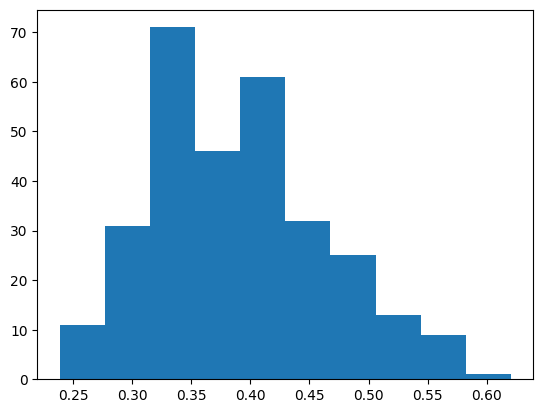

In [139]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.array(toxic_emb) @ resp_emb)

(array([ 8., 21., 44., 74., 64., 44., 25., 11.,  7.,  2.]),
 array([0.35228071, 0.38923305, 0.42618537, 0.46313769, 0.50009   ,
        0.53704238, 0.5739947 , 0.61094701, 0.64789939, 0.68485171,
        0.72180402]),
 <BarContainer object of 10 artists>)

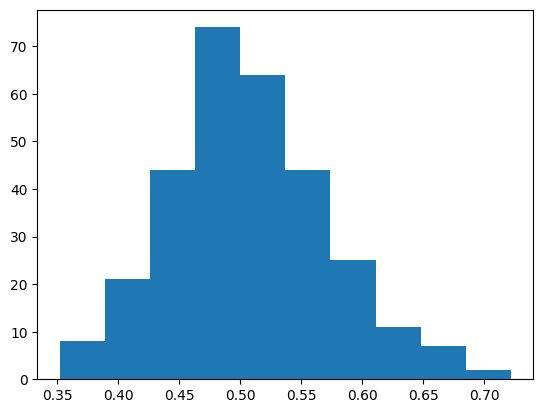

In [142]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(np.array(toxic_emb) @ bad_emb)

Приведем с помощью ассистента токсичное выражение в нормальное

In [149]:
await client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        {
            'role': 'user',
            'content': 'Добавь положительный окрас. Вы никогда ничего не добьетесь'
        }
    ],
)


ChatCompletion(id='gen-mKrlFfDcw8kP63rgwjwFcfswAdHH', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Настоящие победы приходят к тем, кто не боится поражений. Каждая неудача - это шанс учиться и становиться сильнее. Верь в себя и свои силы, и ты обязательно добьешься своих целей!', role='assistant', function_call=None, tool_calls=None))], created=1714634901, model='openai/gpt-3.5-turbo-1106', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=88, prompt_tokens=31, total_tokens=119, total_cost=0.000207))

### Перевод задач


ChatGpt прекрасно справляется с задачами перевода

Возьмем датасет из задач американских атестационных задач, сгруппированных по сложности

https://huggingface.co/datasets/hendrycks/competition_math

In [150]:
from datasets import load_dataset

dataset = load_dataset("hendrycks/competition_math")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [151]:
example = dataset['train'][0]
example

{'problem': 'Let \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ if }x>2, \\\\\nx-5 &\\text{ if } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ if } x <-2.\n\\end{array}\n\\right.\\]Find $a+b$ if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).',
 'level': 'Level 5',
 'type': 'Algebra',
 'solution': 'For the piecewise function to be continuous, the cases must "meet" at $2$ and $-2$. For example, $ax+3$ and $x-5$ must be equal when $x=2$. This implies $a(2)+3=2-5$, which we solve to get $2a=-6 \\Rightarrow a=-3$. Similarly, $x-5$ and $2x-b$ must be equal when $x=-2$. Substituting, we get $-2-5=2(-2)-b$, which implies $b=3$. So $a+b=-3+3=\\boxed{0}$.'}

Задача перевести 300 задач с постановкой и решением

In [18]:
tasks = []
dataset['train'].map(lambda row: tasks.append(row))

Map:   0%|          | 0/7500 [00:00<?, ? examples/s]

Dataset({
    features: ['problem', 'level', 'type', 'solution'],
    num_rows: 7500
})

Подбираем инструкцию

In [153]:
from openai import AsyncOpenAI
client = AsyncOpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=open_ai_token,
)

#### Перевод постановки

In [154]:
example["problem"]

'Let \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ if }x>2, \\\\\nx-5 &\\text{ if } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ if } x <-2.\n\\end{array}\n\\right.\\]Find $a+b$ if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).'

In [38]:
result = await client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        {
        'role': 'user',
        'content': f'Переведи задачу, используя latex. Только перевод. {example["problem"]}'
        }
    ],
)
problem_ru = result.choices[0].message.content
problem_ru

'Пусть \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ если }x>2, \\\\\nx-5 &\\text{ если } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ если } x <-2.\n\\end{array}\n\\right.\\] Найдите $a+b$, если кусочно-заданная функция непрерывна (что означает, что ее график можно нарисовать, не отрывая карандаша от бумаги).'

#### Перевод решения

In [34]:
example["solution"]

'For the piecewise function to be continuous, the cases must "meet" at $2$ and $-2$. For example, $ax+3$ and $x-5$ must be equal when $x=2$. This implies $a(2)+3=2-5$, which we solve to get $2a=-6 \\Rightarrow a=-3$. Similarly, $x-5$ and $2x-b$ must be equal when $x=-2$. Substituting, we get $-2-5=2(-2)-b$, which implies $b=3$. So $a+b=-3+3=\\boxed{0}$.'

In [37]:
result = await client.chat.completions.create(
    model="openai/gpt-3.5-turbo-1106",
    messages=[
        {
        'role': 'user',
        'content': f'Переведи решение, используя latex. Только перевод. {example["solution"]}'
        }
    ],
)
solution_ru = result.choices[0].message.content
solution_ru

'Для того, чтобы кусочно-заданная функция была непрерывной, случаи должны "совпадать" при $x=2$ и $x=-2$. Например, $ax+3$ и $x-5$ должны быть равны при $x=2$. Это означает, что $a(2)+3=2-5$, откуда получаем $2a=-6 \\Rightarrow a=-3$. Аналогично, $x-5$ и $2x-b$ должны быть равны при $x=-2$. Подставив, получаем $-2-5=2(-2)-b$, что приводит к $b=3$. Таким образом, $a+b=-3+3=\\boxed{0}$.'

In [155]:
from openai import AsyncOpenAI
from os import getenv

class OpenAiTranslator:
    def __init__(self):
        self.client = AsyncOpenAI(
            base_url="https://openrouter.ai/api/v1",
            api_key=open_ai_token,
        )
    async def problem_ru(self, problem):
        result = await client.chat.completions.create(
            model="openai/gpt-3.5-turbo-1106",
            messages=[
                {
                'role': 'user',
                'content': f'Переведи задачу, используя latex. Только перевод. {problem}'
                }
            ],
        )
        return result.choices[0].message.content
    async def solution_ru(self, solution):
        result = await client.chat.completions.create(
            model="openai/gpt-3.5-turbo-1106",
            messages=[
                {
                'role': 'user',
                'content': f'Переведи решение, используя latex. Только перевод. {solution}'
                }
            ],
        )
        return result.choices[0].message.content


Начнем с тестового запуска на 10 задачах

In [157]:
import logging
logging.basicConfig(level=logging.INFO)
async def openAiWorker(worker_id,in_q,out_q):
    translator = OpenAiTranslator()
    while True:
        task = await in_q.get()
        task['problem_ru'] = await translator.problem_ru(task["problem"])
        print(f'{worker_id=}.{task["problem_ru"]=}')
        task['solution_ru'] = await translator.solution_ru(task["solution"])
        print(f'{worker_id=}.{task["solution_ru"]=}')
        await out_q.put(task)
        in_q.task_done()


In [159]:
from tqdm import tqdm
import time
for i in tqdm(range(10)):
    time.sleep(1)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


Справка по порядку работы с асинхронной очередью с ограниченым размером

In [166]:
a = asyncio.Queue(maxsize=3)

await a.put({'item':1})
print('1')
await a.put(2)
print('2')
await a.put(3)
print('3')
await a.get()
print(a)
# опционально для получения сигнала
#a.task_done()
await a.put(4)
print('4')

1
2
3
<Queue maxsize=3 _queue=[2, 3] tasks=3>
4


In [158]:
import asyncio
from tqdm import tqdm

async def translate_tasks(size):

    # ограничиваем размер входной очереди
    input_q = asyncio.Queue(maxsize=3)
    out_q = asyncio.Queue()

    translation_pool = [asyncio.create_task(openAiWorker(worker_id, input_q, out_q)) for worker_id in range(3)]


    for task in tqdm(tasks[:size]):
        await input_q.put(task)

    await input_q.join()

    for task in translation_pool:
        task.cancel()

    return out_q

results = await translate_tasks(10)
results

 40%|████      | 4/10 [00:00<00:00, 11.14it/s]

worker_id=2.task["problem_ru"]='Какова степень полинома $(4 +5x^3 +100 +2\\pi x^4 + \\sqrt{10}x^4 +9)$?'
worker_id=0.task["problem_ru"]='Find \\(a+b\\) if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).'


 70%|███████   | 7/10 [00:04<00:02,  1.48it/s]

worker_id=1.task["problem_ru"]='Образование прямоугольной формации - это формация с $m$ членами в каждом из $r$ рядов, где $m$ и $r$ - целые числа. У определенной формации меньше 100 членов. Директор располагает их в прямоугольной формации и обнаруживает, что у него остаются два лишних члена. Если он увеличивает количество членов в каждом ряду на 1 и уменьшает количество рядов на 2, в новой формации будет ровно столько мест для каждого члена. Какое максимальное количество членов может быть у группы?'
worker_id=0.task["solution_ru"]='Для того, чтобы кусочно-заданная функция была непрерывной, случаи должны "совпадать" при $2$ и $-2$. Например, $ax+3$ и $x-5$ должны быть равны при $x=2$. Это означает, что $a(2)+3=2-5$, что приводит к $2a=-6 \\Rightarrow a=-3$. Аналогично, $x-5$ и $2x-b$ должны быть равны при $x=-2$. Подставляя, получаем $-2-5=2(-2)-b$, что влечет за собой $b=3$. Таким образом, $a+b=-3+3=\\boxed{0}$.'


 80%|████████  | 8/10 [00:04<00:01,  1.67it/s]

worker_id=2.task["solution_ru"]='Этот многочлен не записан в стандартной форме. Однако нам не нужно записывать его в стандартной форме, и нам не нужно обращать внимание на коэффициенты. Мы просто ищем показатели степени $x$. У нас есть член $x^4$ и ни одного другого члена более высокой степени, поэтому $\\boxed{4}$ - это степень многочлена.'
worker_id=0.task["problem_ru"]='Оцените $\\left\\lceil3\\left(6-\\frac12\\right)\\right\\rceil$.'
worker_id=2.task["problem_ru"]='Переведите задачу, используя LaTeX. Только перевод.\n\nСэм нанят на 20 дней. В дни, когда он работает, он зарабатывает 60 долларов. За каждый день, когда он не работает, из его заработка вычитается 30 долларов. В конце 20-дневного периода он получил 660 долларов. Сколько дней он не работал?'


 90%|█████████ | 9/10 [00:06<00:01,  1.04s/it]

worker_id=0.task["solution_ru"]='Итак, $3\\left(6-\\frac12\\right)=18-1-\\frac12=17-\\frac12$. Поскольку $0\\le\\frac12<1$, мы имеем $\\left\\lceil17-\\frac12\\right\\rceil=\\boxed{17}$.'
worker_id=0.task["problem_ru"]='Найдите центр окружности с уравнением $x^2 - 6x + y^2 + 2y = 9$.'


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]

worker_id=1.task["solution_ru"]='Пусть $x$ - количество участников в каждом ряду в исходной формации, когда остаются двое лишних. Затем мы можем написать два уравнения из имеющейся информации: \n$$rx+2=m$$\n$$(r-2)(x+1)=m$$\nПриравнивая их, мы получаем: \n$$rx+2=(r-2)(x+1)=rx-2x+r-2$$\n$$2=-2x+r-2$$\n$$4=r-2x$$\nМы знаем, что в оркестре меньше 100 участников. Исходя из первого уравнения, у нас должно быть $rx$ меньше 98. Мы можем попробовать несколько значений $r$ и $x$ в последнем уравнении. Если $r=18$, то $x=7$ и $rx=126$, что слишком много. Если $r=16$, то $x=6$ и $rx=96$, что меньше 98. Проверив второе уравнение, мы видим, что $(16-2)(6+1)=14\\cdot 7=98$, что и должно быть. Это наилучший вариант, поэтому наибольшее количество участников в оркестре может быть $\\boxed{98}$.'


worker_id=0.task["solution_ru"]='Завершая квадрат, мы получаем $(x - 3)^2 + (y + 1)^2 = 19$. Следовательно, центр окружности равен $\\boxed{(3, -1)}$.'
worker_id=0.task["problem_ru"]='Если $x = 2$ и $y = 5$, то каково значение выражения $\\frac{x^4+2y^2}{6}$?'
worker_id=1.task["problem_ru"]='Каковы все значения $p$, для которых для каждого $q>0$ выполняется\n$$\\frac{3(pq^2+p^2q+3q^2+3pq)}{p+q}>2p^2q?$$\nВыразите ваш ответ в интервальной записи в десятичной форме.'
worker_id=2.task["solution_ru"]='Определим через $x$ количество дней, которые Сэм работает, и через $y$ количество дней, которые он не работает. Мы можем составить следующую систему уравнений, отражающую данную информацию:\n\\begin{align*}\nx+y &= 20 \\\\\n60x - 30y &= 660 \\\\\n\\end{align*}\nПервое уравнение представляет общее количество дней, которые Сэм работает, второе уравнение представляет его общую прибыль. Решив первое уравнение относительно $x$, получаем $x = 20 - y$. Подставив это во второе уравнение, получаем $60

<Queue at 0x7eb348d731f0 maxsize=0 _queue=[{'problem': 'Let \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ if }x>2, \\\\\nx-5 &\\text{ if } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ if } x <-2.\n\\end{array}\n\\right.\\]Find $a+b$ if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).', 'level': 'Level 5', 'type': 'Algebra', 'solution': 'For the piecewise function to be continuous, the cases must "meet" at $2$ and $-2$. For example, $ax+3$ and $x-5$ must be equal when $x=2$. This implies $a(2)+3=2-5$, which we solve to get $2a=-6 \\Rightarrow a=-3$. Similarly, $x-5$ and $2x-b$ must be equal when $x=-2$. Substituting, we get $-2-5=2(-2)-b$, which implies $b=3$. So $a+b=-3+3=\\boxed{0}$.', 'problem_ru': 'Find \\(a+b\\) if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).', 'solution_ru': 'Для того, чтобы кусочно-заданная функция была непрерыв

#### Теперь работает ассистент :)

In [74]:
results = await translate_tasks(300)

100%|██████████| 300/300 [06:55<00:00,  1.38s/it]


In [76]:
import pandas as pd

df = pd.DataFrame(results._queue)


In [77]:
df

,level,problem,problem_ru,solution,solution_ru,type
0,Level 3,What is the degree of the polynomial $(4 +5x^3...,Какова степень полинома $(4 +5x^3 +100 +2\pi x...,This polynomial is not written in standard for...,Этот многочлен не написан в стандартной форме....,Algebra
1,Level 5,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",Find $a+b$ if the piecewise function is contin...,"For the piecewise function to be continuous, t...",Для того чтобы кусочно-заданная функция была н...,Algebra
2,Level 3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Оцените $\left\lceil3\left(6-\frac12\right)\ri...,"Firstly, $3\left(6-\frac12\right)=18-1-\frac12...",\begin{align*}\n3\left(6-\frac12\right) &= 18-...,Algebra
3,Level 5,A rectangular band formation is a formation wi...,Прямоугольная формация оркестра - это формация...,Let $x$ be the number of band members in each ...,Пусть $x$ - количество участников группы в каж...,Algebra
4,Level 4,Find the center of the circle with equation $x...,Find the center of the circle with equation \n...,"Completing the square, we get $(x - 3)^2 + (y ...","Завершая квадрат, получаем $(x - 3)^2 + (y + 1...",Algebra
...,...,...,...,...,...,...
295,Level 5,"Let $(x,y)$ be an ordered pair of real numbers...","Пусть $(x,y)$ - упорядоченная пара действитель...","Moving all the terms to the LHS, we have the e...","Перенеся все члены в левую часть, у нас есть у...",Algebra
296,Level 2,What is the distance on a Cartesian coordinate...,Каково расстояние на декартовой координатной п...,"Using the distance formula, we get that the di...","Используя формулу расстояния, получаем, что ра...",Algebra
297,Level 1,Simplify $16^{\frac{1}{2}}-625^{\frac{1}{2}}$.,\documentclass{article}\n\t\usepackage[utf8]{i...,We can simply plug in $16^{\frac{1}{2}}=4$ and...,Просто подставим $16^{\frac{1}{2}}=4$ и $625^{...,Algebra
298,Level 3,"Without using a calculator, compute $1003^2-99...",Вычислите $1003^2-997^2-1001^2+999^2$ без испо...,Applying the difference of squares factorizati...,Применяя факторизацию разности квадратов по от...,Algebra


Теперь я могу очень просто поделиться своим датасетом со всеми

In [78]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)

In [80]:
from google.colab import userdata
hf_token = userdata.get('HuggingFaceToken')

In [82]:
dataset.push_to_hub("NMashalov/ru_tasks",token=hf_token)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/NMashalov/ru_tasks/commit/ec911bde953457ab5544bb578024add406d8abba', commit_message='Upload dataset', commit_description='', oid='ec911bde953457ab5544bb578024add406d8abba', pr_url=None, pr_revision=None, pr_num=None)

В следующем занятии.

Интерактивный поиск по учебнику, журналу